Практикум №4<br>
Дисципліна: Обробка та аналіз БМД<br>
Студент: Збаровський Дмитро<br>
Група: БС-81

In [241]:
import numpy as np
import pandas as pd
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
%matplotlib inline

1. Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [242]:
data = [];
for i in range(6):
    if(i<3):
        data.append(sorted(np.random.normal(0,1,20)))
    else:
        data.append(sorted(np.random.uniform(-6,6,20)))
for i in data:
    print(str(i) + "\n")

[-2.1089835836460877, -1.3878249348097655, -1.1370676606954264, -1.1101176199379168, -0.9980543083167416, -0.8077091304025708, -0.7450086398389397, -0.7172255385599735, -0.6479346976033096, -0.20074995879102275, 0.002376526632346697, 0.02824805817235122, 0.2821405927777499, 0.3184036698120819, 0.43283617590828394, 0.6498141438032718, 0.873266036394627, 1.034126766511813, 1.1187463044313124, 2.5142075397894073]

[-2.5325037677779862, -1.323648337931646, -1.2204556278182455, -1.2040050165838965, -1.087346656684515, -0.9081086740555071, -0.7226606552712389, -0.6274235320650031, -0.6141017246417492, -0.3315475081794394, -0.3046760605713633, -0.16238039975563545, -0.06307473278892013, -0.033571709801997585, 0.1558380393126629, 0.42910137907232704, 0.4337663009207017, 0.4852246822633034, 1.2856748337625525, 1.365541717454075]

[-0.8442888086338339, -0.7416129645493906, -0.6647408913284018, -0.6535100150538721, -0.49551504490504783, -0.4251393271835432, -0.3431587509381605, -0.149653664497012

2. Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку

In [243]:
def ShapiroWilk(data):
    n = len(data)
    
    a = pd.read_excel("Coeficients for the W test for normality.xlsx")[n]/10000
    w_table = pd.read_excel("Рoints of the distribution of W.xlsx")[ 'Unnamed: 1'][n]/1000

    k = int(n/2 if (n%2==0) else (n-1)/2)
    m = np.mean(data)
    nm = 0
    
    for i in data:
        nm += (i-m)**2

    b = 0
    for i in range(k):
        b += a[i]*(data[n-i-1] - data[i])
    w = (b**2)/nm
    
    if(w > w_table):
        return "normal"
    else:
        return "non-normal"

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.<br>
-Занести в стовпчик Variable назви змінних.<br>
-Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".<br>
-Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення.   Записати в таблицю. Форма запису: Середнє [стандартне відхилення].<br>
-Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].


In [244]:
table = pd.DataFrame(
{
    "Variable": ["Normal" if (i < 3) else "Non Normal" for i in range(6)],
    "Statistics": ["%.3f[%.3f]" % (np.mean(data[i]), np.std(data[i])) if (ShapiroWilk(data[i]) == "normal")
                  else "%.3f[%.3f , %.3f]" % (np.median(data[i]), np.quantile(data[i], 0.25), np.quantile(data[i], 0.75))
                  for i in range(6)],
    "Distribution": [ShapiroWilk(data[i]) for i in range(6)],
})

table

,Variable,Statistics,Distribution
0,Normal,-0.130[1.047],normal
1,Normal,-0.349[0.904],normal
2,Normal,0.268[0.845],normal
3,Non Normal,"-2.030[-3.044 , 3.998]",non-normal
4,Non Normal,"-1.344[-3.633 , 2.858]",non-normal
5,Non Normal,-0.697[3.159],normal


4. Зберегти таблицю в пдф форматі

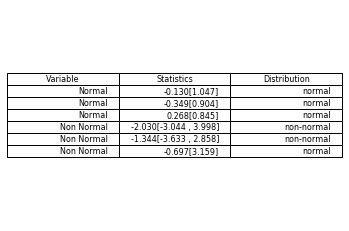

In [245]:
fig = plt.figure()
ax = fig.add_subplot(111)

cell_text = []
for row in range(len(table)):
    cell_text.append(table.iloc[row])

ax.table(cellText = cell_text, colLabels = table.columns, loc = 'center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("table.pdf")
pdf.savefig(fig)
pdf.close()